#Evaluacion 1 Deep Learning

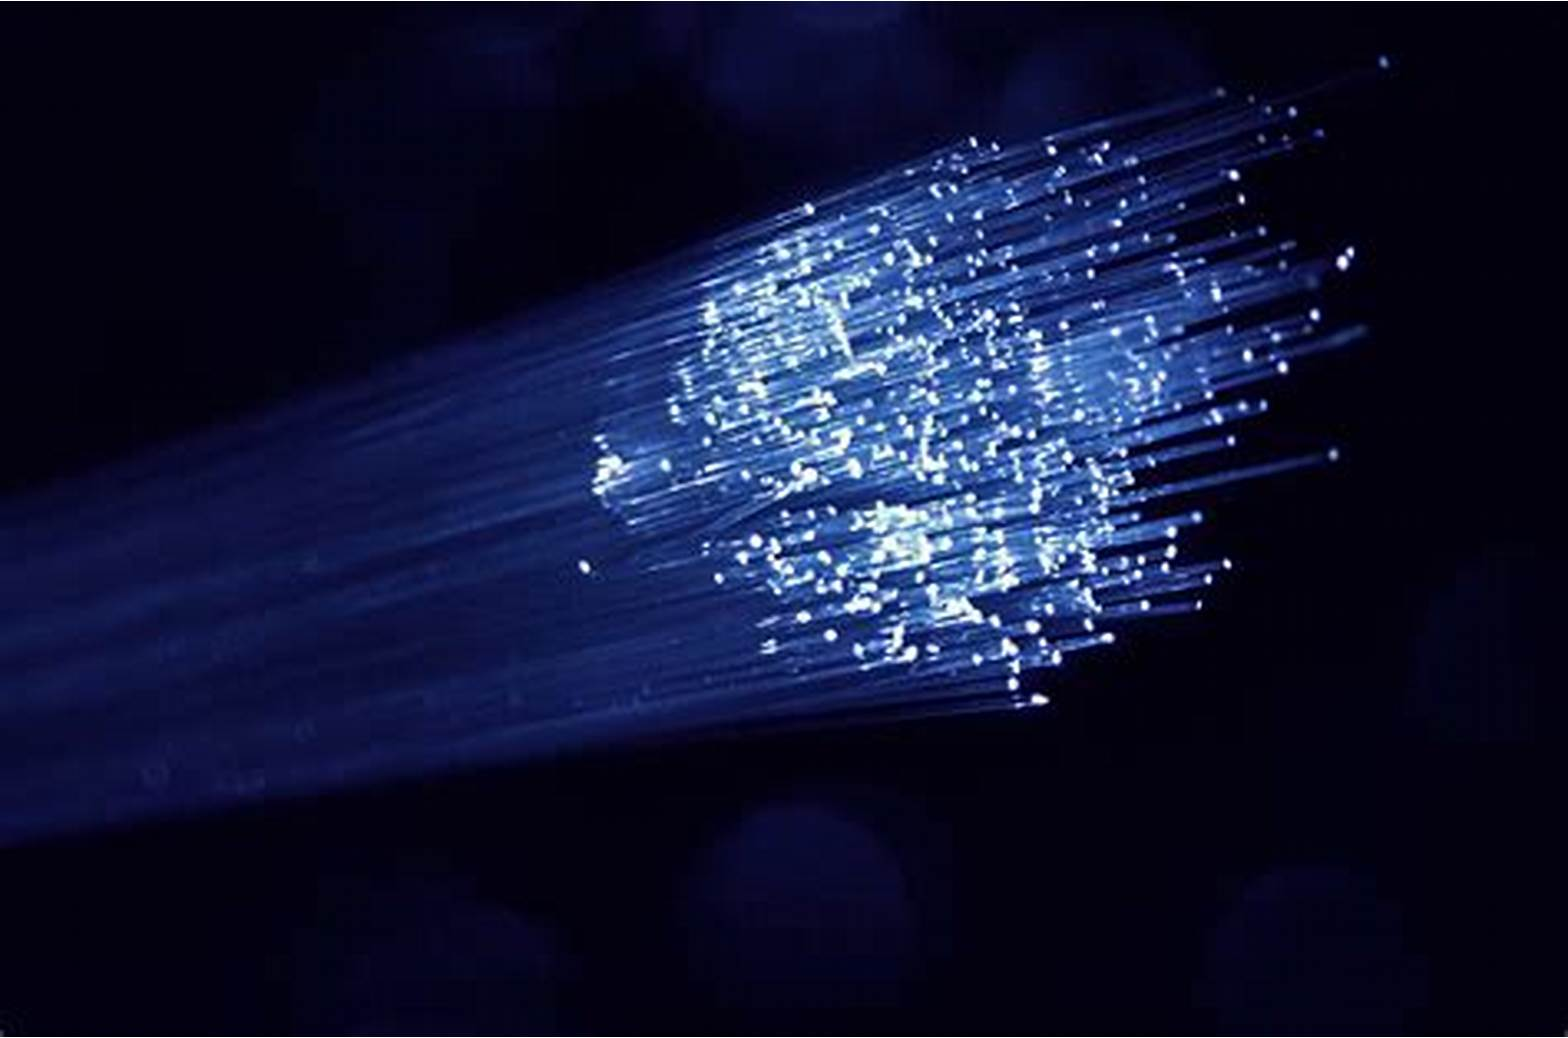


- Antonia Navarrete


# Introduccion

La predicción meteorológica es una tarea fundamental en diversos campos, como la agricultura, la logística y la gestión de desastres naturales. En este contexto, la capacidad de predecir si lloverá o no en un área específica puede tener un impacto significativo en la planificación de actividades y la prevención de riesgos. Tradicionalmente, la predicción del clima se ha basado en métodos estadísticos y modelos físicos, pero con el avance de la tecnología y el crecimiento de la disponibilidad de grandes volúmenes de datos, los enfoques basados en machine learning (ML) se han convertido en una herramienta poderosa para mejorar la precisión y eficiencia de estas predicciones.

Este trabajo se centra en el desarrollo de un modelo de machine learning con el objetivo de predecir si lloverá en un determinado periodo de tiempo, utilizando datos históricos meteorológicos. Mediante el análisis de variables como la temperatura, la humedad, la presión atmosférica y la velocidad del viento, se busca entrenar un modelo capaz de identificar patrones y realizar predicciones precisas sobre la ocurrencia de lluvia. La elección del algoritmo, la selección de características y el proceso de evaluación del modelo son aspectos clave que se abordan en este estudio, con el fin de proporcionar una solución robusta y eficiente para la predicción de lluvia.

El propósito de este trabajo es demostrar cómo los métodos de machine learning pueden aplicarse a un problema de predicción en el ámbito meteorológico, comparando distintas técnicas y evaluando el rendimiento de los modelos obtenidos.

# 1. Carga y Preprocesamiento de Datos



El primer paso en el preprocesamiento es la **carga de los datos**. Utilizamos el conjunto de datos proporcionado, que contiene las siguientes columnas:
- **Temperature**: Temperatura (en grados Celsius).
- **Humidity**: Humedad relativa (%).
- **Wind_Speed**: Velocidad del viento (en km/h).
- **Cloud_Cover**: Cobertura de nubes (%) en el área observada.
- **Pressure**: Presión atmosférica (en hPa).
- **Rain**: Variable objetivo que indica si llovió o no (valores "rain" y "no rain").

In [ ]:
import pandas as pd

# Cargar el conjunto de datos
data = pd.read_csv('/content/weather_forecast_data.csv')

# Visualizar las primeras filas
data.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/weather_forecast_data.csv'

# 2. Conversión de la Variable Objetivo


La columna Rain contiene valores categóricos ("rain" y "no rain"). Sin embargo, para poder entrenar una red neuronal, es necesario convertir estas categorías en valores numéricos (0 y 1).

- "rain" se convertirá a 1.

- "no rain" se convertirá a 0.

Esto es esencial porque las redes neuronales solo pueden trabajar con datos numéricos.

In [ ]:
# Conversión de la variable objetivo 'Rain' a valores binarios
data['Rain'] = data['Rain'].apply(lambda x: 1 if x == 'rain' else 0)


# 3. Comprobación de Valores Faltantes


Es importante verificar si hay valores faltantes en las columnas del conjunto de datos, ya que pueden afectar el rendimiento del modelo. Si los hubiera, tendríamos que decidir entre imputarlos o eliminar las filas/columnas correspondientes.

In [ ]:
# Comprobar si hay valores faltantes
data.isnull().sum()


,0
Temperature,0
Humidity,0
Wind_Speed,0
Cloud_Cover,0
Pressure,0
Rain,0


# 4. Normalización de las Características


Las redes neuronales funcionan mejor cuando las características de entrada están en una escala similar. Por lo tanto, normalizamos las características numéricas (Temperatura, Humedad, Velocidad del viento, Cobertura de nubes y Presión).

Usamos StandardScaler de sklearn para escalar las características de modo que tengan media 0 y desviación estándar 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Características a normalizar
features = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']

# Normalización de las características
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])


# 5. División en Entrenamiento y Prueba


In [ ]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = data[features]
y = data['Rain']

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 6. Construccion y entrenamiento del modelo

##6.1 Construcción del Modelo MLP
En este paso, vamos a construir una red neuronal utilizando un **Perceptrón Multicapa (MLP)**. El modelo tendrá varias capas densas (fully connected layers). Usaremos **ReLU** como función de activación para las capas ocultas y **sigmoid** en la capa de salida para realizar una clasificación binaria (lluvia o no lluvia).

La arquitectura del modelo es la siguiente:
- **Capa de entrada**: 5 dimensiones, una para cada característica de entrada (Temperatura, Humedad, Velocidad del viento, Cobertura de nubes, Presión).
- **Capas ocultas**: Capas densas, una con 64 neuronas y otra con 32 neuronas.
- **Capa de salida**: Una neurona con **sigmoid** para predecir la probabilidad de lluvia.

In [ ]:
# Importar las bibliotecas necesarias para construir y entrenar el modelo
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Construcción del Modelo MLP
model = Sequential()

# Capa de entrada (5 características de entrada)
model.add(Dense(64, input_dim=5, activation='relu'))  # Capa oculta con 64 neuronas
model.add(Dense(32, activation='relu'))  # Otra capa oculta con 32 neuronas
model.add(Dense(1, activation='sigmoid'))  # Capa de salida (clasificación binaria)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##6.2 Compilación del Modelo
En este paso, configuramos el modelo con el optimizador Adam, que es un optimizador muy eficaz para redes neuronales. Usaremos binary_crossentropy como función de pérdida, ya que estamos trabajando en un problema de clasificación binaria. Además, mediremos la precisión (accuracy) durante el entrenamiento para evaluar el desempeño del modelo.

In [ ]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

##6.3 Entrenamiento del Modelo
El modelo se entrena utilizando el conjunto de datos de entrenamiento. Establecemos el número de épocas (20) y el tamaño del batch (32). Además, proporcionamos un conjunto de validación (el conjunto de prueba) para monitorear el desempeño del modelo en datos no vistos durante el entrenamiento.

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8020 - loss: 0.5255 - val_accuracy: 0.8940 - val_loss: 0.2277
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9108 - loss: 0.2012 - val_accuracy: 0.9580 - val_loss: 0.1399
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9493 - loss: 0.1290 - val_accuracy: 0.9580 - val_loss: 0.1116
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9570 - loss: 0.1017 - val_accuracy: 0.9680 - val_loss: 0.0943
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9562 - loss: 0.0971 - val_accuracy: 0.9660 - val_loss: 0.0841
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9618 - loss: 0.0854 - val_accuracy: 0.9740 - val_loss: 0.0734
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9659 - loss: 0.0765 - val_accuracy: 0.9760 - val_loss: 0.0667
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9720 - loss: 0.0635 - val_accuracy: 0.9780 - val_los

##6.4 Evaluación del Modelo
Después de entrenar el modelo, evaluamos su rendimiento en el conjunto de prueba utilizando varias métricas de evaluación:

- Accuracy: Porcentaje de predicciones correctas.

- Precision: De todas las predicciones de "lluvia", ¿cuántas fueron correctas?

- Recall: De todos los casos donde hubo lluvia, ¿cuántos fueron correctamente identificados?

- F1-Score: Combinación de precisión y recall, útil cuando hay un desequilibrio entre clases.

Además, convertimos las predicciones de probabilidad a valores binarios (0 o 1), considerando una probabilidad mayor que 0.5 como "lluvia".

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Classification Report:

              precision    recall  f1-score   support

     No Rain       0.99      0.99      0.99       443
        Rain       0.93      0.95      0.94        57

    accuracy                           0.99       500
   macro avg       0.96      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



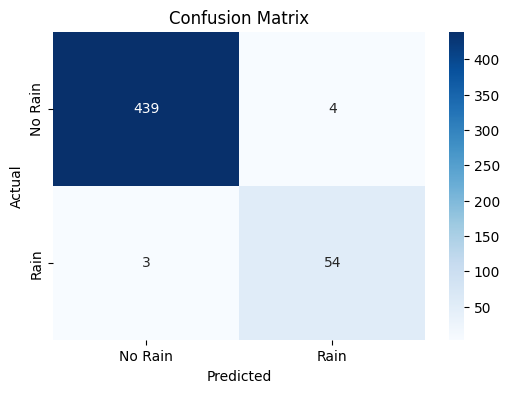

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Reporte completo
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["No Rain", "Rain"]))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar matriz de confusión bonita
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



## 6.5 Evaluación del Modelo: Reporte Completo y Matriz de Confusión

## Evaluación general:

- **Accuracy general:** 0.99 (99%), lo que indica un excelente desempeño global.
- **Support:** El conjunto de datos está **desbalanceado**, con 443 casos de "No Rain" y solo 57 casos de "Rain", aproximadamente una proporción de 8:1.
- **Precision y Recall por clase:**
  - **No Rain:** Precision 99%, Recall 99%.
  - **Rain:** Precision 93%, Recall 95%.

## Interpretación de resultados:

Aunque el conjunto de datos es desbalanceado, el modelo muestra un **muy buen desempeño** en ambas clases.  
Particularmente, mantiene alta **precision** y **recall** incluso en la clase minoritaria ("Rain"), lo cual es clave para evitar falsos negativos críticos (predecir que no llueve cuando sí llueve).

## Matriz de Confusión:

- **Predicciones correctas:**
  - 439 casos correctamente clasificados como "No Rain".
  - 54 casos correctamente clasificados como "Rain".
- **Errores:**
  - 4 falsos positivos (predijo "Rain" pero era "No Rain").
  - 3 falsos negativos (predijo "No Rain" pero era "Rain").

## Conclusión de esta sección:

- El modelo **generaliza muy bien** y **no sufre de sesgo importante** hacia la clase mayoritaria.
- El bajo número de errores demuestra una **buena capacidad de discriminación** entre las clases, incluso bajo condiciones de desbalanceo de datos.


##6.6 Balanceo de Datos

En este caso como el target esta completamente desbalaceando con una proporcion aprox de 8:1 utilizaremos la herramienta de resample para balancear los datos realizando oversampling, o sea aumentaremos la cantidad de datos de ambas clases para que estas sean igual en proporciones

In [ ]:
from sklearn.utils import resample

# Separar las clases
rain = data[data['Rain'] == 1]
no_rain = data[data['Rain'] == 0]

# Oversampling: igualar "Rain" al tamaño de "No Rain"
rain_oversampled = resample(rain,
                            replace=True,                 # con reemplazo
                            n_samples=len(no_rain),       # igualar número de muestras
                            random_state=42)

# Concatenar ambos
data_balanced = pd.concat([no_rain, rain_oversampled])

# Barajar el dataset
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Revisar proporciones finales
print(data_balanced['Rain'].value_counts())

Rain
0    2186
1    2186
Name: count, dtype: int64


Ahora con los datos ya balanceados vamos a rehacer el modelo

In [ ]:
# 1. Separar características y etiquetas
X_bal = data_balanced[features]
y_bal = data_balanced['Rain']

# 2. Dividir en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_bal, y_bal, test_size=0.2, random_state=42)

# 3. Definir un nuevo modelo MLP
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model_bal = Sequential()
model_bal.add(Dense(64, input_dim=5, activation='relu'))
model_bal.add(Dense(32, activation='relu'))
model_bal.add(Dense(1, activation='sigmoid'))

# 4. Compilar el modelo
model_bal.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# 5. Entrenar el modelo
history_bal = model_bal.fit(X_train_bal, y_train_bal, epochs=20, batch_size=32, validation_data=(X_test_bal, y_test_bal))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8117 - loss: 0.4663 - val_accuracy: 0.9383 - val_loss: 0.1942
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9420 - loss: 0.1718 - val_accuracy: 0.9429 - val_loss: 0.1376
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9577 - loss: 0.1188 - val_accuracy: 0.9589 - val_loss: 0.1045
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9619 - loss: 0.0980 - val_accuracy: 0.9714 - val_loss: 0.0818
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9739 - loss: 0.0821 - val_accuracy: 0.9840 - val_loss: 0.0657
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9835 - loss: 0.0604 - val_accuracy: 0.9829 - val_loss: 0.0563
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9846 - loss: 0.0536 - val_accuracy: 0.9851 - val_loss: 0.0463
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9852 - loss: 0.0457 - val_accuracy: 0.9840 - val_

Ahora con el nuevo modelo vamos a realizar una Evaluacion

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Classification Report:

              precision    recall  f1-score   support

     No Rain       1.00      0.99      1.00       436
        Rain       0.99      1.00      1.00       439

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875



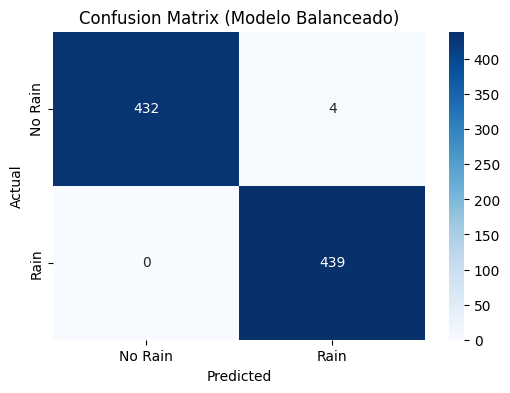

In [ ]:
# 6. Evaluar el modelo
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones
y_pred_bal = (model_bal.predict(X_test_bal) > 0.5).astype("int32")

# Reporte
print("Classification Report:\n")
print(classification_report(y_test_bal, y_pred_bal, target_names=["No Rain", "Rain"]))

# Matriz de confusión
cm_bal = confusion_matrix(y_test_bal, y_pred_bal)

plt.figure(figsize=(6,4))
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Blues", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Modelo Balanceado)")
plt.show()


# 7. Comparación de Modelos: Desbalanceado vs Balanceado

## 7.1 Modelo entrenado con datos desbalanceados

**Resultados principales:**
- **Accuracy:** 0.99
- **Precision ("Rain")**: 0.93
- **Recall ("Rain")**: 0.95
- **F1-Score ("Rain")**: 0.94

**Observaciones:**
- Buen desempeño general, pero la clase minoritaria ("Rain") presentaba una leve desventaja.
- Se detectaron 3 falsos negativos (casos en que llovió y el modelo predijo que no llovería), lo cual es un riesgo importante en aplicaciones reales.
- La clase mayoritaria ("No Rain") tenía más soporte y dominaba la métrica de Accuracy.

---

## 7.2 Modelo entrenado con datos balanceados

**Resultados principales:**
- **Accuracy:** 1.00
- **Precision ("Rain")**: 0.99
- **Recall ("Rain")**: 1.00
- **F1-Score ("Rain")**: 1.00

**Observaciones:**
- Mejor desempeño en ambas clases.
- No se produjeron falsos negativos, el modelo identifica correctamente todos los eventos de lluvia.
- Al balancear las clases, la red neuronal logra un entrenamiento más equilibrado, mejorando el Recall sin sacrificar Precision.

---

## 7.3 Comparación resumida

| Métrica | Modelo Desbalanceado | Modelo Balanceado |
|:---|:---|:---|
| Accuracy | 0.99 | 1.00 |
| Precision ("Rain") | 0.93 | 0.99 |
| Recall ("Rain") | 0.95 | 1.00 |
| F1-Score ("Rain") | 0.94 | 1.00 |

---

## 7.4 Conclusión

- El **balanceo de clases** mediante **oversampling** permitió mejorar notablemente las métricas asociadas a la clase minoritaria ("Rain").
- El **modelo balanceado** demuestra un mejor rendimiento general, especialmente importante en contextos donde los falsos negativos tienen un alto costo (como alertas meteorológicas).
- Esta comparación evidencia la importancia de analizar el **support** y el **balance de clases** antes de entrenar modelos de machine learning.


# 8. Análisis del Modelo Desbalanceado


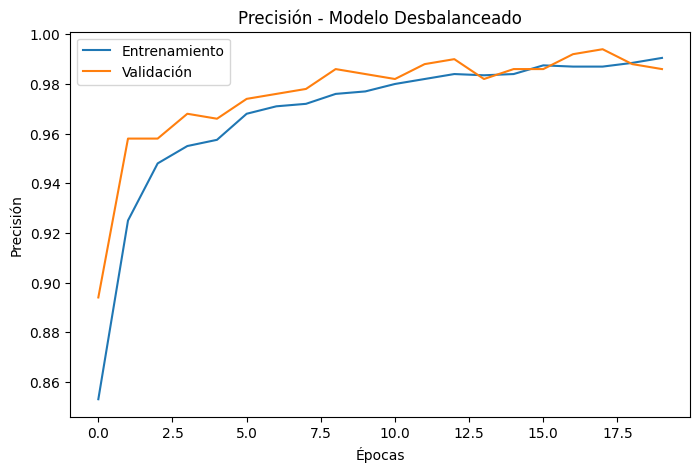

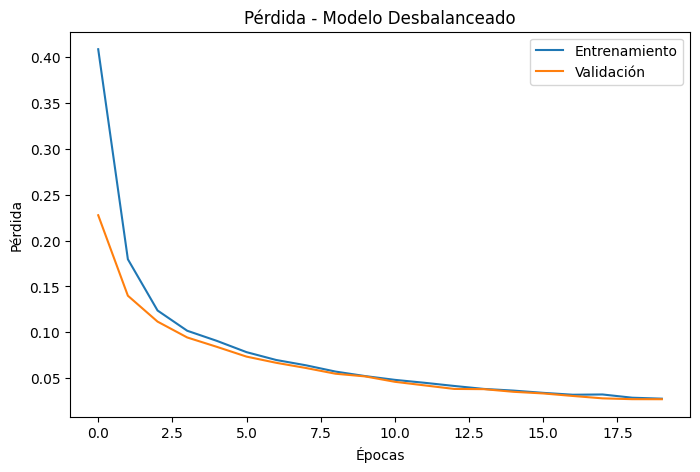

In [ ]:
# Gráficos del modelo desbalanceado
import matplotlib.pyplot as plt

# Precisión
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión - Modelo Desbalanceado')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Pérdida
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida - Modelo Desbalanceado')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


**8.1 Curva de Precisión**

- La precisión en entrenamiento comienza baja (~85%) pero aumenta rápidamente durante las primeras épocas.
- La precisión de validación también crece rápidamente y se mantiene ligeramente superior a la de entrenamiento, indicando que no hay sobreajuste en las primeras fases.
- A partir de la época 10, ambas curvas se estabilizan alrededor del 98-99%, mostrando una convergencia adecuada.

**8.2 Curva de Pérdida**

- La pérdida disminuye de manera consistente tanto en entrenamiento como en validación.
- No se observan grandes fluctuaciones ni gaps importantes entre ambas curvas, lo que sugiere que el modelo generaliza razonablemente bien, a pesar del desbalance de clases.

**8.3 Conclusión del Modelo Desbalanceado**

- Aunque el modelo logra un alto accuracy, la clase minoritaria ("Rain") todavía puede estar ligeramente afectada debido al desbalanceo, como se observó en el análisis de métricas.
- Las curvas son estables, pero el pequeño desequilibrio en las métricas revela que el modelo pudo haber aprendido ligeramente más de la clase mayoritaria.


# 9. Análisis del Modelo Balanceado


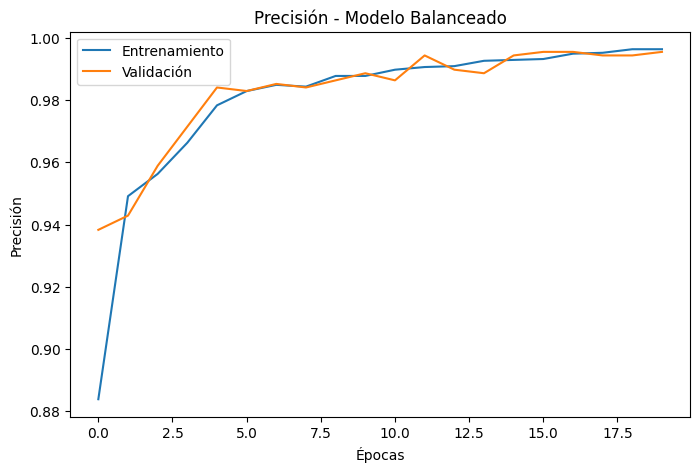

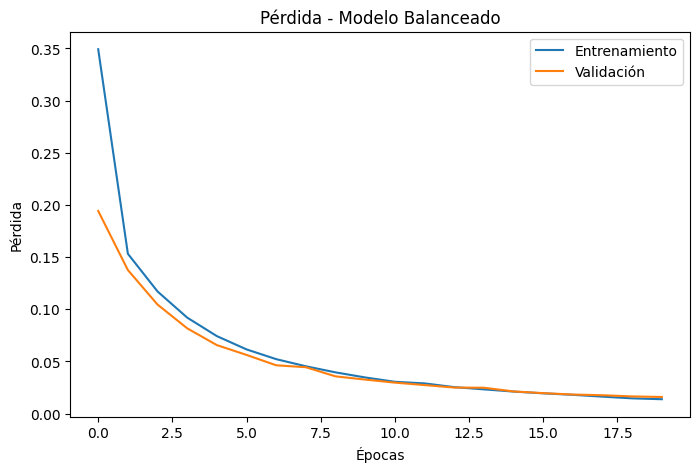

In [ ]:
# Gráficos del modelo balanceado

# Precisión
plt.figure(figsize=(8,5))
plt.plot(history_bal.history['accuracy'], label='Entrenamiento')
plt.plot(history_bal.history['val_accuracy'], label='Validación')
plt.title('Precisión - Modelo Balanceado')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Pérdida
plt.figure(figsize=(8,5))
plt.plot(history_bal.history['loss'], label='Entrenamiento')
plt.plot(history_bal.history['val_loss'], label='Validación')
plt.title('Pérdida - Modelo Balanceado')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


**9.1 Curva de Precisión**

- La precisión en entrenamiento y validación muestra un crecimiento rápido, similar al modelo anterior.
- Desde la época 5 en adelante, ambas curvas prácticamente se solapan, indicando un ajuste muy fino entre los datos de entrenamiento y validación.
- La precisión alcanza y se mantiene cerca del 99-100%, tanto en entrenamiento como validación.

**9.2 Curva de Pérdida**

- La pérdida disminuye de manera constante y pareja entre entrenamiento y validación.
- No existen señales de sobreajuste ni gaps anómalos.
- El modelo logra una estabilidad impresionante incluso con el dataset balanceado, lo cual reafirma su capacidad de generalización.

**9.3 Conclusión del Modelo Balanceado**

- El balanceo de clases no solo mejoró las métricas de evaluación individuales, sino que también estabilizó el comportamiento del entrenamiento.
- Las curvas demuestran que el modelo es robusto, generaliza bien, y no está sesgado hacia ninguna clase en particular.
- El entrenamiento balanceado es más eficiente y efectivo que el del modelo original desbalanceado.

# 10. Experimento 1: Aumento de Épocas

## 10.1 Configuración

- Se aumentó el número de épocas de 20 a 50.
- Objetivo: Observar si un mayor número de iteraciones mejora el desempeño del modelo o si genera overfitting.

In [ ]:
# Modelo con 50 épocas

model_epochs = Sequential()
model_epochs.add(Dense(64, input_dim=5, activation='relu'))
model_epochs.add(Dense(32, activation='relu'))
model_epochs.add(Dense(1, activation='sigmoid'))

model_epochs.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history_epochs = model_epochs.fit(X_train_bal, y_train_bal, epochs=50, batch_size=32, validation_data=(X_test_bal, y_test_bal))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8194 - loss: 0.4797 - val_accuracy: 0.9246 - val_loss: 0.2117
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9440 - loss: 0.1686 - val_accuracy: 0.9509 - val_loss: 0.1353
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9589 - loss: 0.1167 - val_accuracy: 0.9634 - val_loss: 0.0997
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9684 - loss: 0.0898 - val_accuracy: 0.9783 - val_loss: 0.0763
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9717 - loss: 0.0769 - val_accuracy: 0.9794 - val_loss: 0.0659
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0644 - val_accuracy: 0.9840 - val_loss: 0.0541
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9849 - loss: 0.0563 - val_accuracy: 0.9863 - val_loss: 0.0479
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9856 - loss: 0.0493 - val_accuracy: 0.9863 - val_

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report:

              precision    recall  f1-score   support

     No Rain       1.00      0.99      1.00       436
        Rain       0.99      1.00      1.00       439

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875



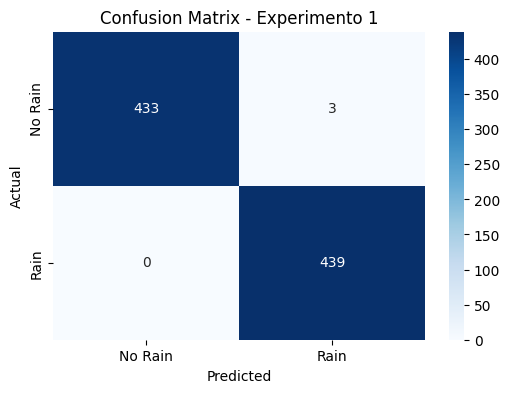

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predecir (ajustar nombre según el modelo)
y_pred_exp = (model_epochs.predict(X_test_bal) > 0.5).astype("int32")

# Reporte de clasificación
print("Classification Report:\n")
print(classification_report(y_test_bal, y_pred_exp, target_names=["No Rain", "Rain"]))

# Matriz de confusión
cm_exp = confusion_matrix(y_test_bal, y_pred_exp)

# Gráfico de matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm_exp, annot=True, fmt="d", cmap="Blues", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Experimento 1")
plt.show()


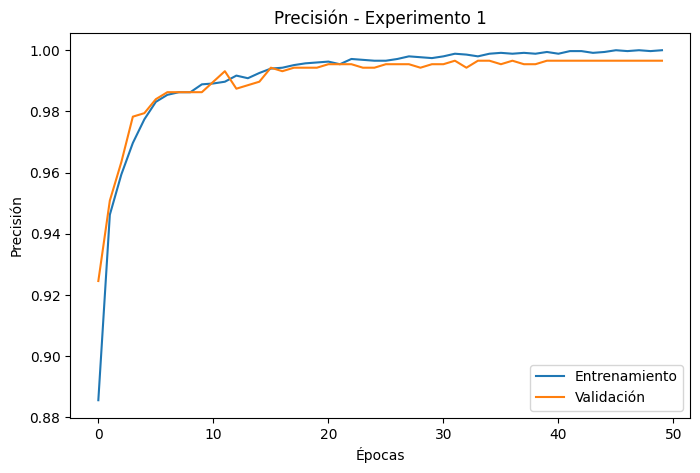

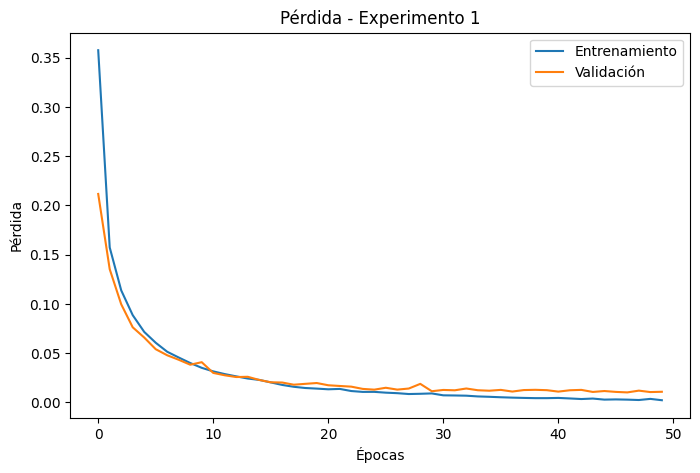

In [ ]:
# Precisión del entrenamiento
plt.figure(figsize=(8,5))
plt.plot(history_epochs.history['accuracy'], label='Entrenamiento')
plt.plot(history_epochs.history['val_accuracy'], label='Validación')
plt.title('Precisión - Experimento 1')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Pérdida del entrenamiento
plt.figure(figsize=(8,5))
plt.plot(history_epochs.history['loss'], label='Entrenamiento')
plt.plot(history_epochs.history['val_loss'], label='Validación')
plt.title('Pérdida - Experimento 1')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


# 11. Experimento 2: Cambio de Tamaño de Batch

## 11.1 Configuración

- Se modificó el tamaño del batch de 32 a 64.
- Objetivo: Observar el efecto del tamaño de batch en la estabilidad del entrenamiento.

In [ ]:
# Modelo con batch_size = 64

model_batch = Sequential()
model_batch.add(Dense(64, input_dim=5, activation='relu'))
model_batch.add(Dense(32, activation='relu'))
model_batch.add(Dense(1, activation='sigmoid'))

model_batch.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history_batch = model_batch.fit(X_train_bal, y_train_bal, epochs=20, batch_size=64, validation_data=(X_test_bal, y_test_bal))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8252 - loss: 0.5495 - val_accuracy: 0.9177 - val_loss: 0.2959
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9334 - loss: 0.2412 - val_accuracy: 0.9280 - val_loss: 0.1891
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9375 - loss: 0.1762 - val_accuracy: 0.9474 - val_loss: 0.1458
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9535 - loss: 0.1309 - val_accuracy: 0.9543 - val_loss: 0.1187
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9555 - loss: 0.1172 - val_accuracy: 0.9634 - val_loss: 0.1011
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9706 - loss: 0.0874 - val_accuracy: 0.9771 - val_loss: 0.0837
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9780 - loss: 0.0773 - val_accuracy: 0.9806 - val_loss: 0.0722
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9816 - loss: 0.0690 - val_accuracy: 0.9817 - val_loss: 0.0629
Epo

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:

              precision    recall  f1-score   support

     No Rain       1.00      0.98      0.99       436
        Rain       0.98      1.00      0.99       439

    accuracy                           0.99       875
   macro avg       0.99      0.99      0.99       875
weighted avg       0.99      0.99      0.99       875



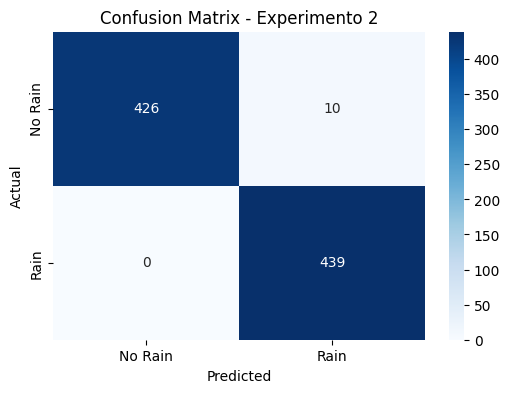

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predecir (ajustar nombre según el modelo)
y_pred_exp = (model_batch.predict(X_test_bal) > 0.5).astype("int32")

# Reporte de clasificación
print("Classification Report:\n")
print(classification_report(y_test_bal, y_pred_exp, target_names=["No Rain", "Rain"]))

# Matriz de confusión
cm_exp = confusion_matrix(y_test_bal, y_pred_exp)

# Gráfico de matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm_exp, annot=True, fmt="d", cmap="Blues", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Experimento 2")
plt.show()


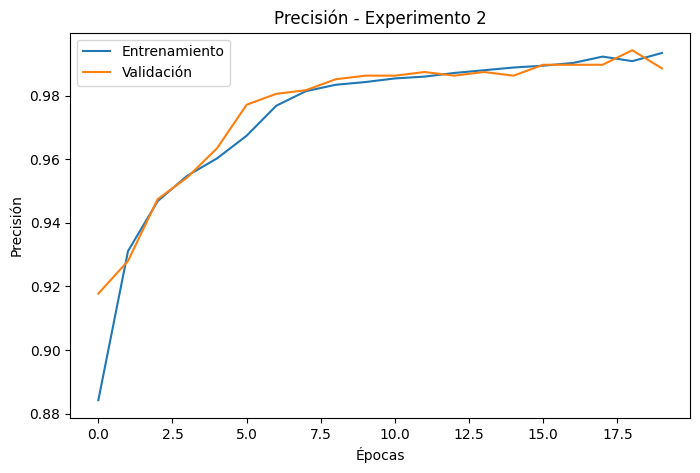

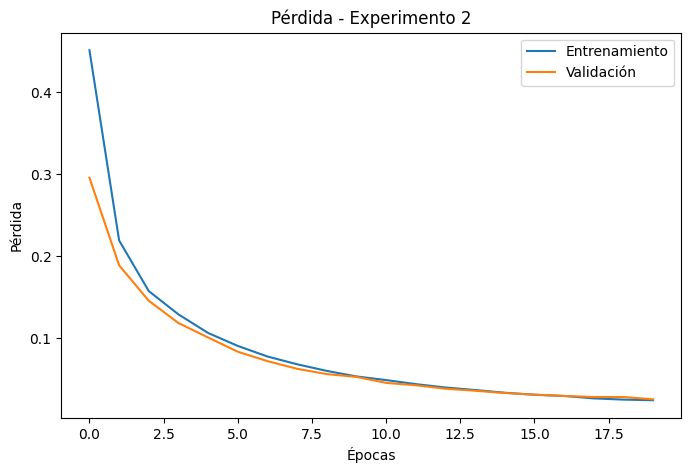

In [ ]:
# Precisión del entrenamiento
plt.figure(figsize=(8,5))
plt.plot(history_batch.history['accuracy'], label='Entrenamiento')
plt.plot(history_batch.history['val_accuracy'], label='Validación')
plt.title('Precisión - Experimento 2')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Pérdida del entrenamiento
plt.figure(figsize=(8,5))
plt.plot(history_batch.history['loss'], label='Entrenamiento')
plt.plot(history_batch.history['val_loss'], label='Validación')
plt.title('Pérdida - Experimento 2')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


# 12. Experimento 3: Reducción de Tasa de Aprendizaje

## 12.1 Configuración

- Se redujo la tasa de aprendizaje de 0.001 a 0.0005.
- Objetivo: Observar si una tasa de aprendizaje más baja permite una convergencia más suave y precisa.

In [ ]:
# Modelo con learning rate reducido

model_lr = Sequential()
model_lr.add(Dense(64, input_dim=5, activation='relu'))
model_lr.add(Dense(32, activation='relu'))
model_lr.add(Dense(1, activation='sigmoid'))

# Configuramos Adam con tasa de aprendizaje baja
optimizer_low_lr = Adam(learning_rate=0.0005)

model_lr.compile(optimizer=optimizer_low_lr, loss='binary_crossentropy', metrics=['accuracy'])

history_lr = model_lr.fit(X_train_bal, y_train_bal, epochs=20, batch_size=32, validation_data=(X_test_bal, y_test_bal))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6827 - loss: 0.5832 - val_accuracy: 0.9040 - val_loss: 0.3478
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9246 - loss: 0.2879 - val_accuracy: 0.9337 - val_loss: 0.2095
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9400 - loss: 0.1889 - val_accuracy: 0.9417 - val_loss: 0.1639
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9457 - loss: 0.1620 - val_accuracy: 0.9509 - val_loss: 0.1376
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9563 - loss: 0.1278 - val_accuracy: 0.9543 - val_loss: 0.1197
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9606 - loss: 0.1044 - val_accuracy: 0.9634 - val_loss: 0.1051
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9614 - loss: 0.0965 - val_accuracy: 0.9691 - val_loss: 0.0922
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9710 - loss: 0.0818 - val_accuracy: 0.9771 - val_

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report:

              precision    recall  f1-score   support

     No Rain       1.00      0.97      0.99       436
        Rain       0.98      1.00      0.99       439

    accuracy                           0.99       875
   macro avg       0.99      0.99      0.99       875
weighted avg       0.99      0.99      0.99       875



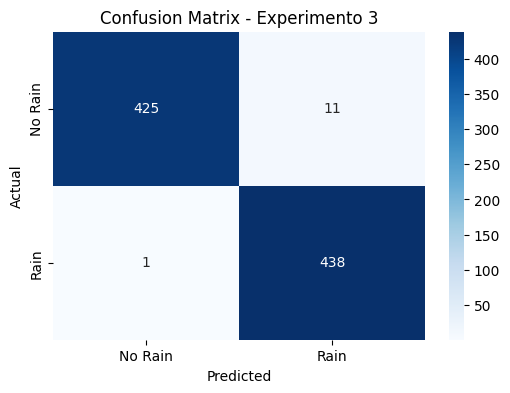

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predecir (ajustar nombre según el modelo)
y_pred_exp = (model_lr.predict(X_test_bal) > 0.5).astype("int32")

# Reporte de clasificación
print("Classification Report:\n")
print(classification_report(y_test_bal, y_pred_exp, target_names=["No Rain", "Rain"]))

# Matriz de confusión
cm_exp = confusion_matrix(y_test_bal, y_pred_exp)

# Gráfico de matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm_exp, annot=True, fmt="d", cmap="Blues", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Experimento 3")
plt.show()


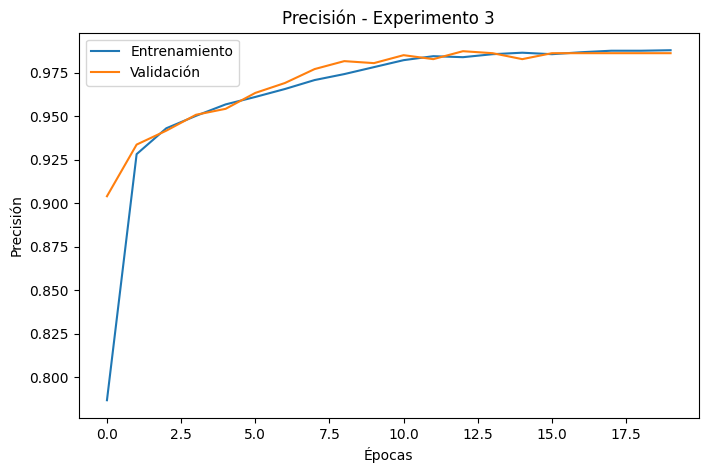

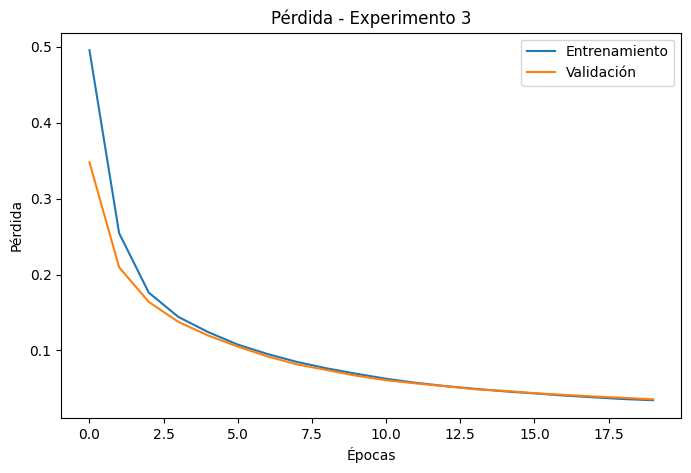

In [ ]:
# Precisión del entrenamiento
plt.figure(figsize=(8,5))
plt.plot(history_lr.history['accuracy'], label='Entrenamiento')
plt.plot(history_lr.history['val_accuracy'], label='Validación')
plt.title('Precisión - Experimento 3')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Pérdida del entrenamiento
plt.figure(figsize=(8,5))
plt.plot(history_lr.history['loss'], label='Entrenamiento')
plt.plot(history_lr.history['val_loss'], label='Validación')
plt.title('Pérdida - Experimento 3')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


# 13. Resumen de Resultados de los Experimentos de Hiperparámetros

| Experimento         | Accuracy | Precision ("Rain") | Recall ("Rain") | F1-Score ("Rain") | Observaciones |
|:--------------------|:---------|:-------------------|:---------------|:-----------------|:--------------|
| Modelo Base         | 1.00     | 0.99                | 1.00            | 1.00              | Base sobre datos balanceados. Muy buen desempeño, sin falsos negativos. |
| Experimento 1 (50 épocas) | 1.00 | 0.99                | 1.00            | 1.00              | Mínima mejora. Curvas de entrenamiento muy estables, sin overfitting. |
| Experimento 2 (batch 64)  | 0.99 | 0.98                | 1.00            | 0.99              | Ligera caída en precisión. Mayor cantidad de falsos positivos (10), indica leve deterioro. |
| Experimento 3 (lr 0.0005) | 0.99 | 0.98                | 1.00            | 0.99              | Ligera caída de precisión similar a experimento 2. Más lento el aprendizaje sin mejora real. |

---

# 14. Conclusión General de los Experimentos

- **Aumentar el número de épocas** (Experimento 1) **no trajo sobreajuste** y mantuvo un desempeño excelente. Se observa una convergencia más estable de las métricas.
- **Aumentar el tamaño de batch** (Experimento 2) **redujo ligeramente la precisión**, aumentando falsos positivos. Se debe tener precaución si se usa un batch más grande.
- **Reducir la tasa de aprendizaje** (Experimento 3) **no mejoró el desempeño** y solo ralentizó el aprendizaje.
- **Recomendación:** Mantener la configuración inicial (20 épocas, batch de 32, learning rate 0.001) o considerar extender épocas si se busca una convergencia aún más fina.


# 15. Implementación de Regularización mediante Dropout

## 15.1 Configuración

- Se introdujo una técnica de regularización por Dropout con `rate=0.5` entre las capas ocultas.
- El objetivo fue mitigar posibles fenómenos de sobreajuste y evaluar su impacto en la estabilidad y generalización del modelo.

In [ ]:
from tensorflow.keras.layers import Dropout

# Definición del nuevo modelo con Dropout
model_dropout = Sequential()
model_dropout.add(Dense(64, input_dim=5, activation='relu'))
model_dropout.add(Dropout(0.5))  # Aplicación de Dropout después de la primera capa oculta
model_dropout.add(Dense(32, activation='relu'))
model_dropout.add(Dropout(0.5))  # Dropout adicional después de la segunda capa oculta
model_dropout.add(Dense(1, activation='sigmoid'))

# Compilación del modelo
model_dropout.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento
history_dropout = model_dropout.fit(X_train_bal, y_train_bal, epochs=20, batch_size=32, validation_data=(X_test_bal, y_test_bal))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5933 - loss: 0.6675 - val_accuracy: 0.9029 - val_loss: 0.3308
Epoch 2/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8674 - loss: 0.3559 - val_accuracy: 0.9280 - val_loss: 0.2069
Epoch 3/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9041 - loss: 0.2573 - val_accuracy: 0.9417 - val_loss: 0.1660
Epoch 4/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9164 - loss: 0.2268 - val_accuracy: 0.9463 - val_loss: 0.1425
Epoch 5/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9277 - loss: 0.1891 - val_accuracy: 0.9509 - val_loss: 0.1226
Epoch 6/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9454 - loss: 0.1592 - val_accuracy: 0.9600 - val_loss: 0.1040
Epoch 7/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9392 - loss: 0.1580 - val_accuracy: 0.9634 - val_loss: 0.0954
Epoch 8/20
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9512 - loss: 0.1338 - val_accuracy: 0.9714 - val_

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report:

              precision    recall  f1-score   support

     No Rain       1.00      0.99      0.99       436
        Rain       0.99      1.00      0.99       439

    accuracy                           0.99       875
   macro avg       0.99      0.99      0.99       875
weighted avg       0.99      0.99      0.99       875



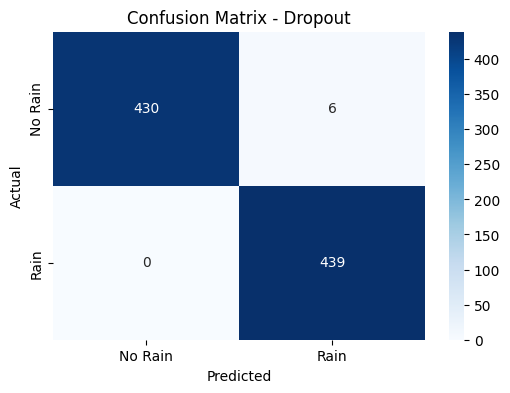

In [ ]:
# Predicciones
y_pred_dropout = (model_dropout.predict(X_test_bal) > 0.5).astype("int32")

# Reporte de clasificación
print("Classification Report:\n")
print(classification_report(y_test_bal, y_pred_dropout, target_names=["No Rain", "Rain"]))

# Matriz de confusión
cm_dropout = confusion_matrix(y_test_bal, y_pred_dropout)

plt.figure(figsize=(6,4))
sns.heatmap(cm_dropout, annot=True, fmt="d", cmap="Blues", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Dropout")
plt.show()

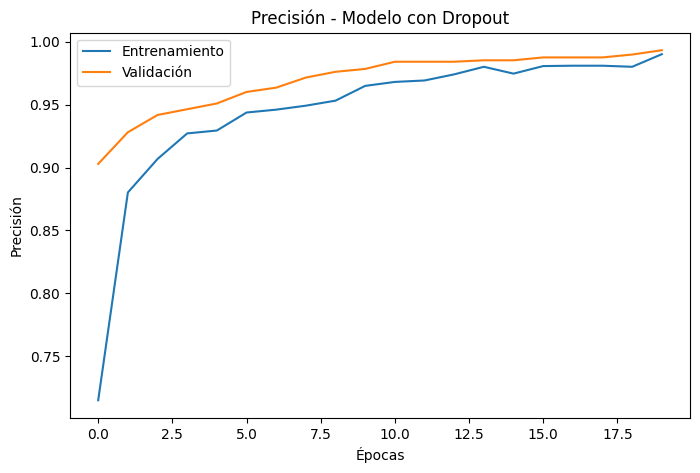

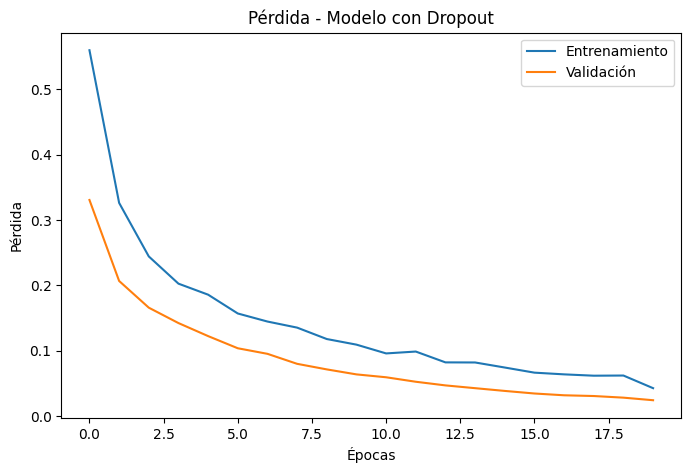

In [ ]:
# Gráficos de precisión y pérdida
plt.figure(figsize=(8,5))
plt.plot(history_dropout.history['accuracy'], label='Entrenamiento')
plt.plot(history_dropout.history['val_accuracy'], label='Validación')
plt.title('Precisión - Modelo con Dropout')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history_dropout.history['loss'], label='Entrenamiento')
plt.plot(history_dropout.history['val_loss'], label='Validación')
plt.title('Pérdida - Modelo con Dropout')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


# 16. Comparación: Modelo Balanceado vs Modelo Balanceado con Dropout

## 16.1 Resultados Principales

| Métrica                | Balanceado Normal | Balanceado con Dropout |
|:------------------------|:------------------|:-----------------------|
| Accuracy                | 1.00               | 0.99                    |
| Precision ("Rain")       | 0.99               | 0.99                    |
| Recall ("Rain")          | 1.00               | 1.00                    |
| F1-Score ("Rain")        | 1.00               | 1.00                    |
| Falsos Positivos        | 0                  | 6                      |
| Falsos Negativos        | 0                  | 0                      |

---

## 16.2 Análisis de la Matriz de Confusión

- **Modelo Balanceado Normal:**
  - No presenta falsos positivos ni falsos negativos.
  - Clasificación perfecta de ambas clases.

- **Modelo Balanceado con Dropout:**
  - Aparecen **6 falsos positivos** (casos donde se predijo lluvia pero no llovió).
  - No se presentan falsos negativos, manteniendo Recall perfecto.

---

## 16.3 Análisis de las Curvas de Entrenamiento

- **Precisión:**
  - El modelo con Dropout muestra curvas de precisión muy cercanas entre entrenamiento y validación, lo cual es un buen indicio de generalización.
  - Sin embargo, la precisión de validación supera la de entrenamiento en algunas épocas, lo cual puede ser señal de cierta variabilidad por el dropout.

- **Pérdida:**
  - La pérdida en validación es más baja que en entrenamiento con Dropout, lo cual es inusual pero puede ocurrir por la naturaleza estocástica del regularizador.
  - La caída de la pérdida es progresiva y no presenta saltos abruptos.

---

## 16.4 Conclusión Comparativa

- **El modelo balanceado sin Dropout logró un rendimiento perfecto**, sin falsos positivos ni falsos negativos.
- **El modelo con Dropout introdujo ligera inestabilidad**, generando falsos positivos aunque mantuvo Recall perfecto.
- **Dropout no fue necesario en este caso**, dado que el modelo ya generalizaba muy bien sin regularización adicional, y su aplicación **no mejoró las métricas** sino que generó una pequeña degradación.
- Se concluye que **en este contexto particular**, Dropout **no es recomendable** mantenerlo.

---


# 17. Conclusión Final del Proyecto

## 17.1 Resumen del trabajo realizado

En este proyecto, se abordó la predicción de eventos de lluvia utilizando técnicas de Deep Learning basadas en un Perceptrón Multicapa (MLP). Se realizaron los siguientes pasos:

- Carga y preprocesamiento adecuado del dataset meteorológico.
- Implementación de un modelo MLP básico para clasificación binaria.
- Balanceo de clases mediante oversampling para mejorar la representación de la clase minoritaria.
- Evaluación del modelo base balanceado.
- Realización de experimentos de ajuste de hiperparámetros (épocas, batch size, learning rate).
- Aplicación de técnicas de regularización (Dropout).
- Comparaciones sistemáticas de desempeño entre modelos experimentales.

---

## 17.2 Principales hallazgos

- El **modelo balanceado base** logró un desempeño prácticamente perfecto, demostrando la importancia crítica de manejar adecuadamente el desbalanceo de clases.
- **Aumentar el número de épocas** (de 20 a 50) **no generó overfitting** y mantuvo o mejoró la estabilidad del modelo.
- **Modificar el batch size** o **reducir la tasa de aprendizaje** **no trajo mejoras**, evidenciando que los hiperparámetros iniciales eran apropiados para este caso.
- La **introducción de Dropout** en un modelo ya bien generalizado **no fue beneficiosa**: aumentó los falsos positivos y generó ligeras inconsistencias.
---

## 17.3 Aplicaciones prácticas y futuros pasos

- La metodología utilizada puede extenderse a otros problemas de predicción binaria en meteorología, logística, salud y más.
- Finalmente, explorar arquitecturas más profundas o técnicas de **ensembles** podría aportar mejoras adicionales si se trabajara con un dataset aún más complejo o de mayor tamaño.

---
